
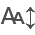

In [1]:
import os
import sys
import numpy as np
import scipy as sp
from importlib import reload
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import json
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

from Block_analysis import *
import small_utilities
reload( small_utilities)
from small_utilities import *



In [11]:
def markers_colors():
        
    import matplotlib
    cm = plt.get_cmap('tab20')
    colors = cm(np.linspace(0, 1, 20))
    # np.array([i for i in matplotlib.markers.MarkerStyle.markers.keys()])[:-4]
    
    return np.array(colors), np.array([i for i in matplotlib.markers.MarkerStyle.markers.keys() if i not in ['None', 'none', ' ', '', ',']])

def _plot_cm_all(input:dict, cbar_label:str, file_name:str=None, save_fig:bool = False, show_fig:bool = False, title_dict:dict = None, offset=None,
                plot_args_in:dict = {'vmin': 0.0, 'vmax': 0.5, 'fig_size': (30,14), 'cax_coor': None, 'cmap': 'jet', 'aspect' : 'auto', 'rotation' : {'x' : 90, 'y' :0},
                                  'tick_size' : {'x' : 18, 'y' : 18, 'cax' :25}, 'label_size' : {'x' : 30, 'y' : 30, 'cax' :30}, 'title_size' :20, 'dpi' : 310, 'labels' : {'x' :"Residues", 'y':"Residues" },
                                  'nrows' : 2, 'ncols' : 5, 'xticks' : None, 'yticks' : None, 'tick_interval' : 2}):
        import matplotlib.pyplot as plt
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        # [0.93, 0.2, 0.02, 0.6] defult cax

        plot_args:dict = {'vmin': 0.0, 'vmax': 0.5, 'fig_size': (30,14), 'cax_coor': None, 'cmap': 'jet', 'aspect' : 'auto', 'rotation' : {'x' : 90, 'y' :0},
                            'tick_size' : {'x' : 18, 'y' : 18, 'cax' :25}, 'label_size' : {'x' : 30, 'y' : 30, 'cax' :30}, 'title_size' :20, 'dpi' : 310, 'labels' : {'x' :"Residues", 'y':"Residues" },
                            'nrows' : 2, 'ncols' : 5, 'xticks' : None, 'yticks' : None, 'tick_interval' : 2}
        
        if plot_args_in :

            for k in plot_args.keys():

                if k in plot_args_in.keys() : plot_args[k] = plot_args_in[k]

        fig, axes = plt.subplots(plot_args['nrows'],plot_args['ncols'], figsize=plot_args['fig_size'], sharex=True, sharey=True, dpi=610, layout='constrained')
        images=[]
        for i in input.keys():
            # ax.set_axis_off()

            p,q = np.unravel_index(i,(plot_args['nrows'], plot_args['ncols']))

            im = axes[p,q].imshow(np.array(input[i]), vmin=plot_args['vmin'], vmax=plot_args['vmax'],cmap=plot_args['cmap'], aspect=plot_args['aspect'])
            im.axes.tick_params(axis='both',which='both',direction='out')
            axes[p,q].invert_yaxis()
            axes[p,q].set_xticks(range(0, len(plot_args['xticks'])+(offset-1),plot_args['tick_interval']), plot_args['xticks'][::plot_args['tick_interval']], rotation=plot_args['rotation']['x'], size=plot_args['tick_size']['x'])
            axes[p,q].set_yticks(range(0, len(plot_args['yticks'])+(offset-1),plot_args['tick_interval']), plot_args['xticks'][::plot_args['tick_interval']], rotation=plot_args['rotation']['y'], size=plot_args['tick_size']['y'])
            axes[p,q].grid(False)
            axes[p,q].set_title(f"{title_dict[i]}",size=plot_args['title_size'], pad=10)


            # if not q : axes[p,q].set_ylabel(plot_args['labels']['y'], size=plot_args['label_size']['y'], labelpad=15)
            # if p == plot_args['nrows']-1 : axes[p,q].set_xlabel(plot_args['labels']['x'], size=plot_args['label_size']['x'], labelpad=15)
            images.append(im)

        if plot_args['cax_coor'] : cax= fig.add_axes(plot_args['cax_coor'])
        # else : cax = fig.add_axes([axes[plot_args['nrows']-1,plot_args['ncols']-1].get_position().x1+0.02,axes[plot_args['nrows']-1,plot_args['ncols']-1].get_position().y0,0.02,axes[0,0].get_position().y1-axes[plot_args['nrows']-1,plot_args['ncols']-1].get_position().y0])
        else : cax = fig.add_axes([axes[plot_args['nrows']-1,plot_args['ncols']-1].get_position().x1+0.12, axes[plot_args['nrows']-1,plot_args['ncols']-1].get_position().y0-0.034, 0.02, axes[0,0].get_position().y1-axes[plot_args['nrows']-1,plot_args['ncols']-1].get_position().y0+0.134])
        # else : 
        #     divider = make_axes_locatable(axes[0,0])
        #     cax = divider.append_axes("right", size="5%", pad=0.05)
            # plt.colorbar(im, cax=cax)
            
        cbar = fig.colorbar(images[-1],cax=cax)
        cbar.set_label(cbar_label, size=plot_args['label_size']['cax'])
        cbar.ax.tick_params(labelsize=plot_args['tick_size']['cax'])
        # cbar.set_ticks([])
        # cbar.set_ticklabels([])

        # fig.text(0.5, 0.04, plot_args['labels']['x'], ha="center", fontsize=plot_args['label_size']['x'])
        # fig.text(-0.05, 0.5, plot_args['labels']['y'], va="center", rotation="vertical", fontsize=plot_args['label_size']['y'])

        fig.supxlabel(plot_args['labels']['x'], size=plot_args['label_size']['x'])
        fig.supylabel(plot_args['labels']['y'], size=plot_args['label_size']['y'])
        
        # plt.tight_layout()
        # plt.grid(alpha=0.1)
        if show_fig : plt.show()

        if save_fig : assert file_name ; out_f = f"{file_name}" ; print(f'saving figure {file_name}!');plt.savefig(out_f, dpi=plot_args['dpi'],bbox_inches='tight')
        else : pass

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    import matplotlib
    
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), size=18, **kw)
            texts.append(text)

    return texts



In [3]:
sequence=  ['ASP121', 'ASN122', 'GLU123', 'ALA124', 'TYR125', 'GLU126', 'MET127', 'PRO128', 'SER129', 'GLU130', 'GLU131', 'GLY132', 'TYR133', 'GLN134', 'ASP135',
'TYR136', 'GLU137', 'PRO138', 'GLU139', 'ALA140']

w_dir= '/home/kongo/work/REST_DATA/'

data_list_apo= [f"{w_dir}/REST2/data_apo_10/",
                f"{w_dir}/REST2/data_apo_20/",
                f"{w_dir}/ssREST3/data_apo_8/",
                f"{w_dir}/ssREST3/data_apo_16/"]


legend_title= ['REST2 (10)', 'REST2 (20)', 'ssREST3 (08)', 'ssREST3 (16)']

color, marker = markers_colors()

temperature={ 0 : compute_temperatures((300, 450), 10),
              1 : compute_temperatures((300, 600), 20),
              2 : compute_temperatures((300, 450), 8),
              3 : compute_temperatures((300, 450), 16)}

ticks_pnum, ticks_pname = sequence_ticks_1(sequence)

nrep=[10, 20, 8, 16]

In [4]:
files = os.listdir(data_list_apo[0])

# Filter out JSON files
json_files = np.array([file for file in files if file.endswith('.json')])

print(json_files)

['bend_angle.json' 'helix_contant.json' 'rg.json' 'alphabeta_ppII.json'
 'sa.json' 'p_contact_map.json' 'pp.json' 'alphabeta_alpharight.json'
 'alphabeta_betasheet.json' 'sheet_contant.json']


In [5]:
files = ['rg.json', 'helix_contant.json', 'sheet_contant.json', 'p_contact_map.json', 'bend_angle.json', 'replica_temp.xvg','replica_index.xvg']

rg=load_json(f'{data_list_apo[0]}/{files[0]}')
helix=load_json(f'{data_list_apo[0]}/{files[1]}')
sheet=load_json(f'{data_list_apo[0]}/{files[2]}')
p_cm=load_json(f'{data_list_apo[0]}/{files[3]}')
ba=load_json(f'{data_list_apo[0]}/{files[4]}')

xvg_temp=np.loadtxt(f'{data_list_apo[0]}/{files[5]}', comments=['#','@'])
xvg_index=np.loadtxt(f'{data_list_apo[0]}/{files[6]}', comments=['#','@'])


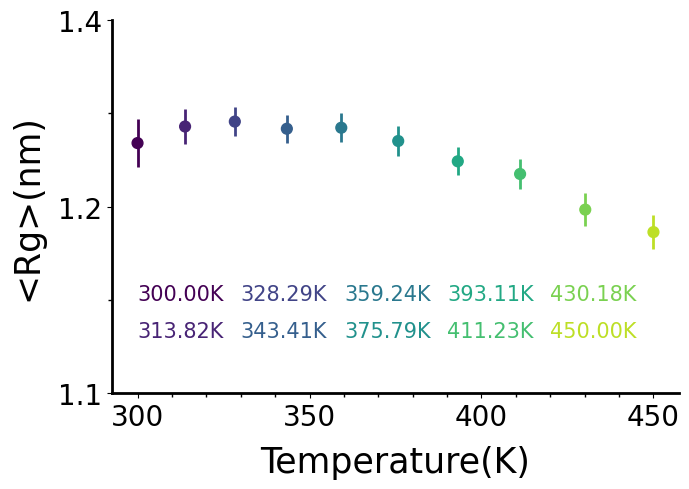

In [59]:
fig, ax = plt.subplots(figsize=(7,5))

ax.scatter(temperature[0],[get_blockerror_pyblock_nanskip(np.array(rg[f'rep:{i}']))[0] for i in range(nrep[0])], s=60, c=[plt.cm.viridis(i/nrep[0]) for i in range(nrep[0])])
ax.errorbar(temperature[0],[get_blockerror_pyblock_nanskip(np.array(rg[f'rep:{i}']))[0] for i in range(nrep[0])], elinewidth=2, 
            yerr=[get_blockerror_pyblock_nanskip(np.array(rg[f'rep:{i}']))[1] for i in range(nrep[0])], ecolor=[plt.cm.viridis(i/nrep[0]) for i in range(nrep[0])], ls='none')

ax.tick_params(labelsize=20)
ax.set_yticks(np.arange(1.15,1.4,0.1),[f"{i:2.1f}" for i in np.arange(1.15,1.4,0.1)])
ax.set_xticks(np.arange(300,500,50), np.arange(300,500,50))
ax.set_xlabel("Temperature(K)", labelpad=10, size=25)
ax.set_ylabel("<Rg>(nm)", labelpad=10, size=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(50/5))
ax.tick_params(axis='x', which='minor', length=3, width=1, color='k', direction='out')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.1/2))
ax.tick_params(axis='y', which='minor', length=3, width=1, color='k', direction='out')

y=1.2
x=300
for i in range(len(temperature[0])):
        
    ax.text(x, y, f"{temperature[0][i]:6.2f}K", size=15, color=plt.cm.viridis(i/nrep[0]))
    y=y-0.02
    if i%2 : x = x+30 ; y=1.2

plt.tight_layout()

plt.tight_layout()

# plt.savefig('./rg_temp.png', dpi=610)

<Figure size 1500x500 with 0 Axes>

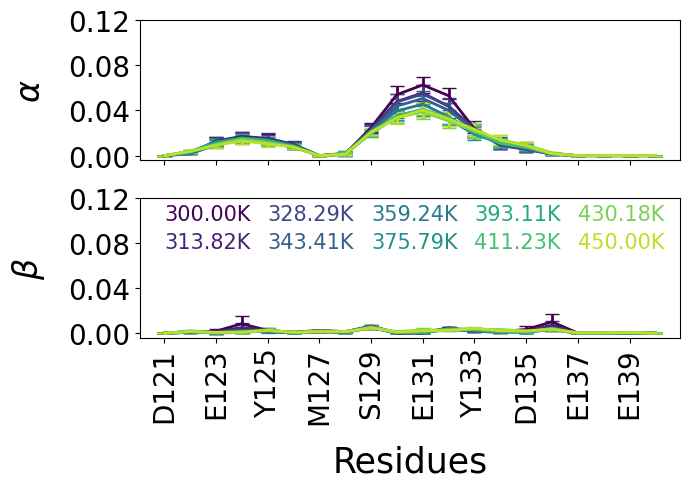

In [9]:
in_dict={int(i.split(':')[1]):helix[i] for i in helix.keys() if 'rep' in i}
in_dict_2={int(i.split(':')[1]):sheet[i] for i in sheet.keys() if 'rep' in i}

plt.figure(figsize=(15,5))

fig, axes = plt.subplots(2,1, figsize=(7,5), sharex=True, sharey=True)

for i in in_dict.keys():
        
    axes[0].errorbar(ticks_pnum, np.array(in_dict[i]).T[0], yerr=np.array(in_dict[i]).T[1], color=plt.cm.viridis(i/nrep[0]), lw=2, capsize=5)
    axes[1].errorbar(ticks_pnum, np.array(in_dict_2[i]).T[0], yerr=np.array(in_dict_2[i]).T[1], color=plt.cm.viridis(i/nrep[0]), lw=2, capsize=5)

axes[0].tick_params(labelsize=20)
axes[0].set_ylabel(r'$\alpha$', size=24,labelpad=15)

axes[1].tick_params(labelsize=20)
axes[1].set_xticks(range(0,20,2), ticks_pnum[::2],rotation=90)
axes[1].set_yticks(np.arange(0,0.14,0.04))
axes[1].set_xlabel('Residues', size=25, labelpad=15)
axes[1].set_ylabel(r'$\beta$', size=24,labelpad=15)



y=0.1
x=0
for i in range(len(temperature[0])):
        
    axes[1].text(x, y, f"{temperature[0][i]:6.2f}K", size=15, color=plt.cm.viridis(i/nrep[0]))
    y=y-0.025
    if i%2 : x = x+4 ; y=0.1

plt.tight_layout()

# plt.savefig('./ss.png', dpi=610)


In [12]:
plot_args={'vmin': 0.0,
           'vmax': 0.5,
           'fig_size': (10,24),
        #    'cax_coor': [.92, .11, .03, .77],
           'cmap': 'jet',
           'aspect' : 'auto',
           'rotation' : {'x' : 90, 'y' :0},
           'tick_size' : {'x' : 28, 'y' : 28, 'cax' :30},
           'label_size' : {'x' : 38, 'y' : 38, 'cax' :36},
           'title_size' :28,
           'dpi' : 210,
           'labels' : {'x' :"Residues", 'y':"Residues" },
           'nrows' : 5,
           'ncols' : 2,
           'xticks' : [" "  if i%3 else ticks_pnum[i] for i in range(len(ticks_pname)) ],
           'yticks' : [" "  if i%3 else ticks_pnum[i] for i in range(len(ticks_pname)) ],
           'tick_interval' : 1}

in_dict={int(i.split(':')[1]):p_cm[i] for i in p_cm.keys() if 'rep' in i}
_plot_cm_all(in_dict, 'Contact Fraction', show_fig=True, title_dict=[f'{round(temperature[0][i])}K' for i in range(nrep[0])], offset=1, 
             plot_args_in=plot_args)
# plt.savefig('./p_cm.png',dpi=610)

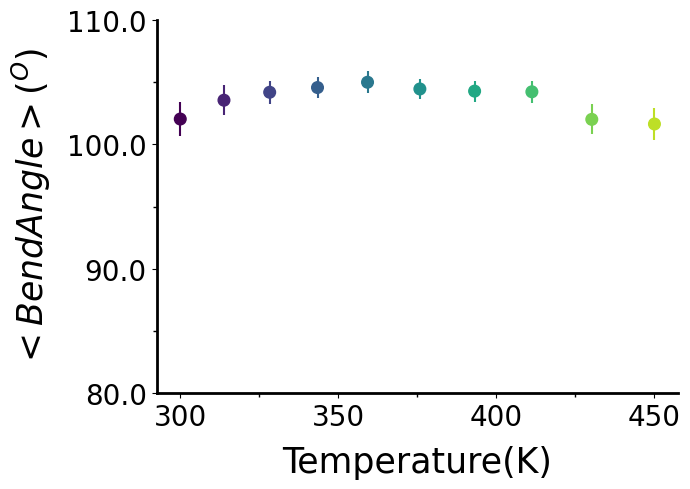

In [13]:
fig, ax = plt.subplots(figsize=(7,5))

ax.scatter(temperature[0],[ba[f'rep:{i}'][0] for i in range(nrep[0])], s=70, c=[plt.cm.viridis(i/nrep[0]) for i in range(nrep[0])])
ax.errorbar(temperature[0],[ba[f'rep:{i}'][0] for i in range(nrep[0])], yerr=[ba[f'rep:{i}'][1] for i in range(nrep[0])], ecolor=[plt.cm.viridis(i/nrep[0]) for i in range(10)], ls='none')

ax.tick_params(labelsize=20)
ax.set_yticks(np.arange(80,120,10),[f"{i:2.1f}" for i in np.arange(80,120,10)])
ax.set_xticks(np.arange(300,500,50), np.arange(300,500,50))
ax.set_xlabel("Temperature(K)", labelpad=10, size=25)
ax.set_ylabel(r"$<Bend Angle>(^{O})$", labelpad=10, size=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(50/2))
ax.tick_params(axis='x', which='minor', length=3, width=1, color='k', direction='out')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10/2))
ax.tick_params(axis='y', which='minor', length=3, width=1, color='k', direction='out')

plt.tight_layout()

# plt.savefig('./rg_temp.png', dpi=610)